Implementing Otsu's Method for Image
Thresholding

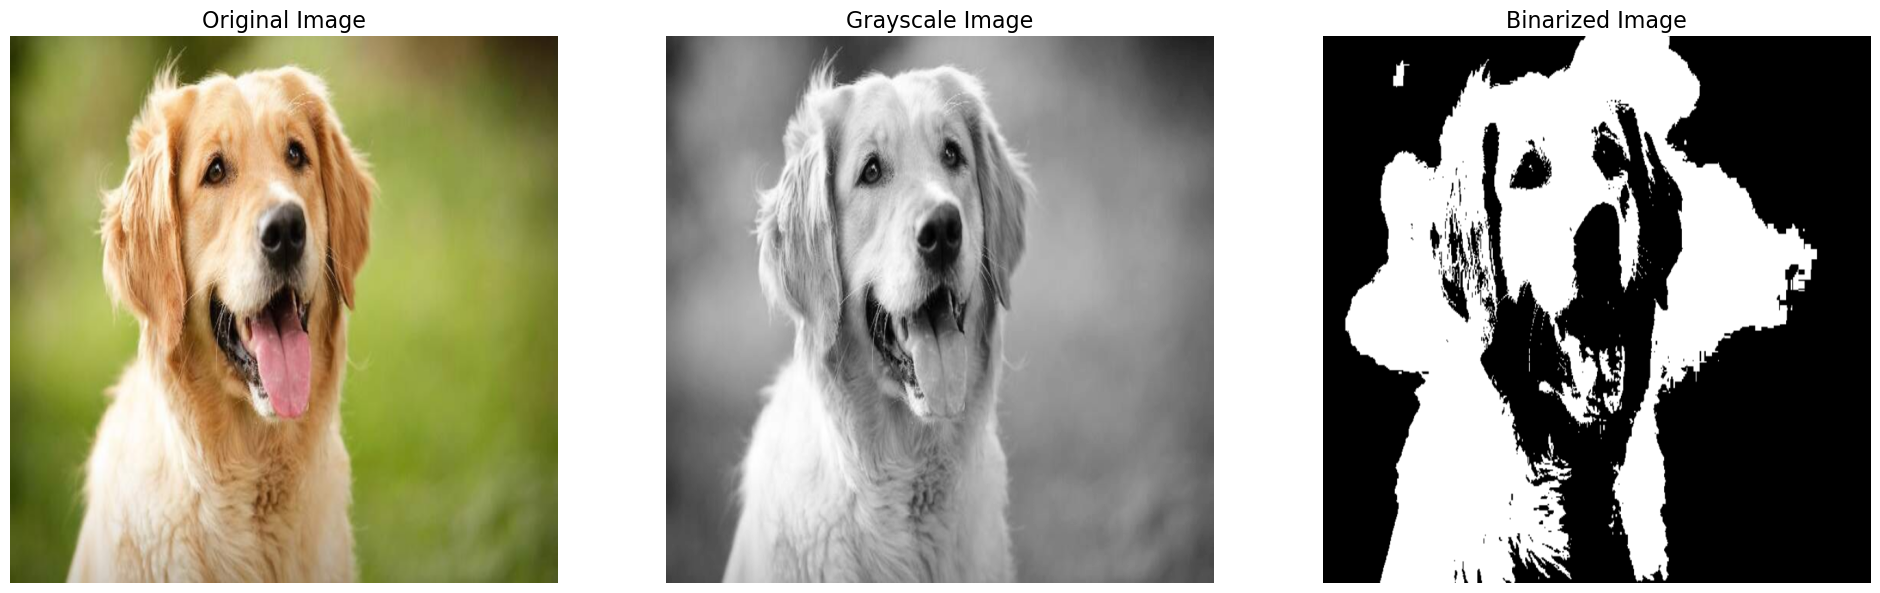

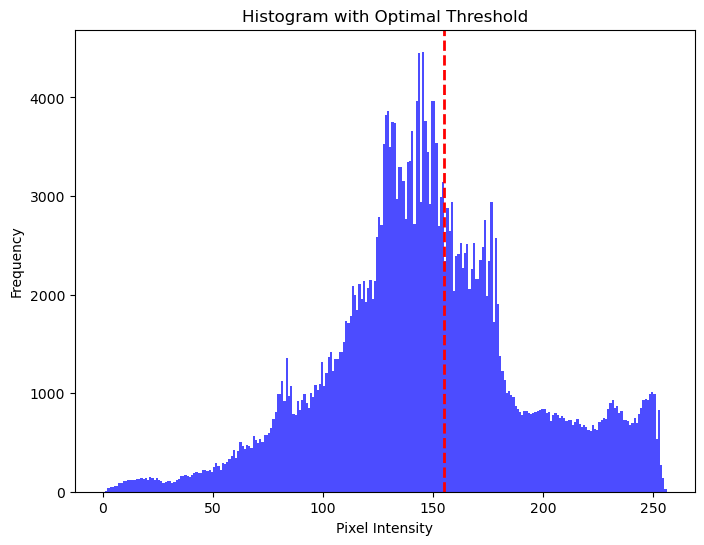

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def otsu_thresholding(image):
    # Calculate histogram
    histogram, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])

    # Normalize the histogram to get probabilities
    histogram = histogram / float(np.sum(histogram))

    # Calculate cumulative sum and cumulative mean
    cumulative_sum = np.cumsum(histogram)
    cumulative_mean = np.cumsum(histogram * np.arange(256))

    # Calculate the global mean
    global_mean = cumulative_mean[-1]

    # Calculate between-class variance for each threshold
    denom = cumulative_sum * (1 - cumulative_sum)
    denom = np.where(denom == 0, np.nan, denom)  # Replace zero with NaN to avoid division errors
    between_class_variance = (global_mean * cumulative_sum - cumulative_mean) ** 2 / denom

    # Handle division by zero and NaN values
    between_class_variance = np.nan_to_num(between_class_variance, nan=0.0, posinf=0.0, neginf=0.0)

    # Find the threshold that maximizes the between-class variance
    optimal_threshold = np.argmax(between_class_variance)

    return optimal_threshold, histogram

# Load a sample color image
image_color = cv2.imread(r'C:\Users\Zaheer\Downloads\dog.jpg')

# Check if the image was loaded successfully
if image_color is None:
    raise ValueError("Image not found or unable to load. Please check the file path.")

# Convert the color image to grayscale
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

# Find the optimal threshold using Otsu's method
threshold, histogram = otsu_thresholding(image_gray)

# Apply the threshold to binarize the grayscale image
_, binary_image = cv2.threshold(image_gray, threshold, 255, cv2.THRESH_BINARY)

# Resize images for better visualization
width, height = 800, 800
resized_o_image = cv2.resize(image_color, (width, height))
resized_g_image = cv2.resize(image_gray, (width, height))
resized_b_image = cv2.resize(binary_image, (width, height))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Display the images
axes[0].imshow(cv2.cvtColor(resized_o_image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image", fontsize=16)
axes[0].axis('off')

axes[1].imshow(resized_g_image, cmap='gray')
axes[1].set_title("Grayscale Image", fontsize=16)
axes[1].axis('off')

axes[2].imshow(resized_b_image, cmap='gray')
axes[2].set_title("Binarized Image", fontsize=16)
axes[2].axis('off')

# Create a new figure for the histogram
plt.figure(figsize=(8, 6))
plt.hist(image_gray.flatten(), bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2)
plt.title('Histogram with Optimal Threshold')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1)

plt.show()
